### Import Necessary libraries

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
# Ignoring warnings
filterwarnings('ignore')

### Reading the dataset into a DataFrame using pandas

In [176]:
df_stock = pd.read_csv('./infolimpioavanzadoTarget.csv')

### Displaying the first few rows of the DataFrame

In [177]:
df_stock.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


### Displaying information about the DataFrame

In [178]:
df_stock.info

<bound method DataFrame.info of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15    

### shape of the DataFrame

In [179]:
df_stock.shape

(7781, 1285)

### summary statistics of the DataFrame

In [180]:
df_stock.describe

<bound method NDFrame.describe of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15  

### Checking for missing values in the DataFrame

In [181]:
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

### Selecting relevant columns from the DataFrame

In [182]:
data_new = df_stock[['date', 'open', 'high', 'low', 'close']]

### Creating a binary target variable where 1 indicates an increase in price and 0 indicates no increase

In [183]:
# Create target variable
data_new["tomorrow"] = data_new["close"].shift(-1)
data_new["target"] = (data_new["tomorrow"] > data_new["close"]).astype(int)


### Dropping rows with missing values

In [184]:
data_new.dropna(inplace=True)

### Plotting a line graph of open, high, low, and close prices over time

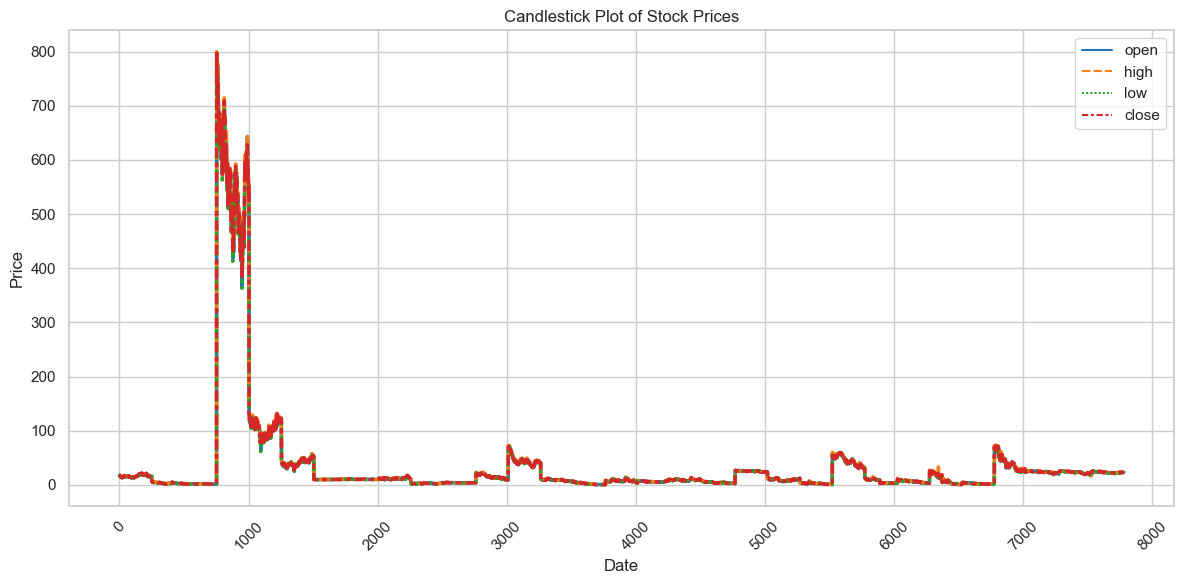

In [185]:
# Candlestick plot for open, high, low, and close prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_new[['open', 'high', 'low', 'close']], palette="tab10", linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Plot of Stock Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotting a distribution plot for open, high, low, and close prices

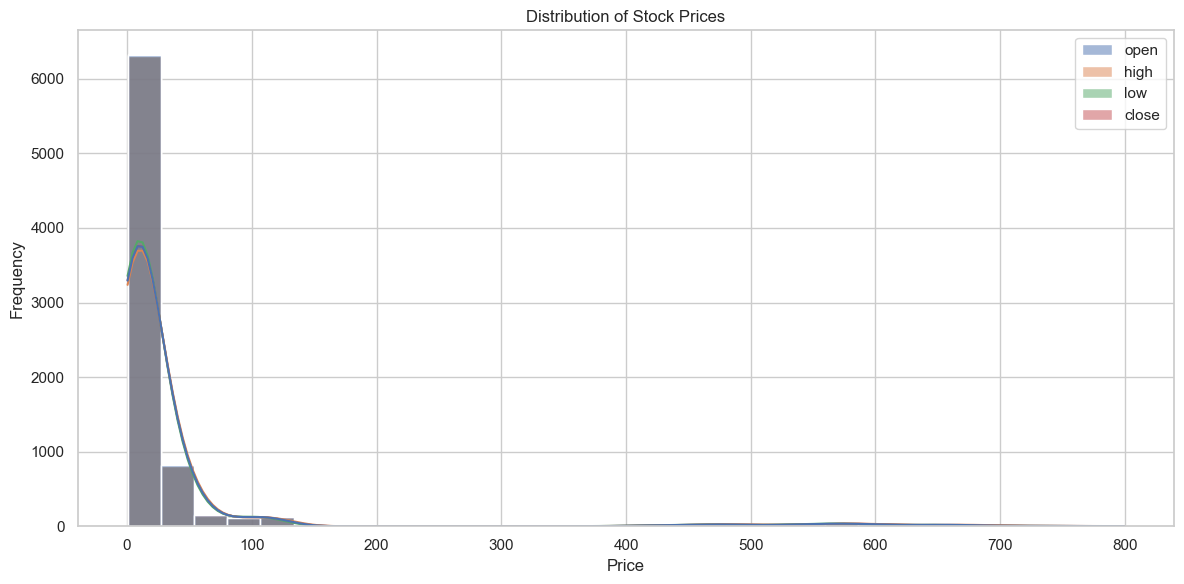

In [186]:
# Distribution plot for open, high, low, and close prices
plt.figure(figsize=(12, 6))
sns.histplot(data=data_new[['open', 'high', 'low', 'close']], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.tight_layout()
plt.show()

### Plotting a box plot for open, high, low, and close prices

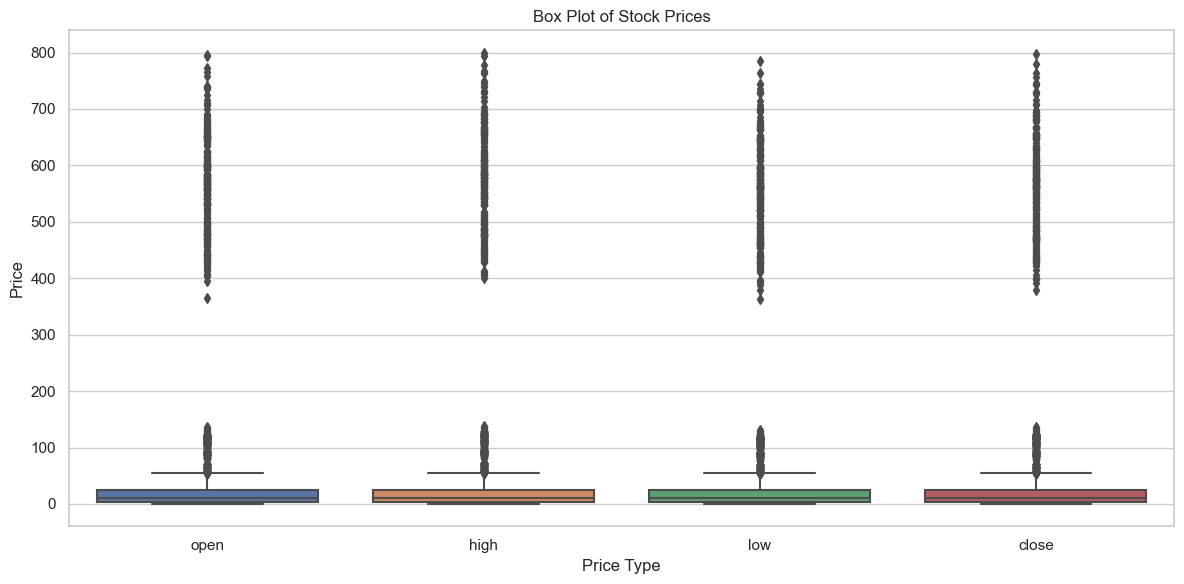

In [187]:
# Box plot for open, high, low, and close prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_new[['open', 'high', 'low', 'close']])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Box Plot of Stock Prices')
plt.tight_layout()
plt.show()

###  Plotting a pair plot for open, high, low, and close prices

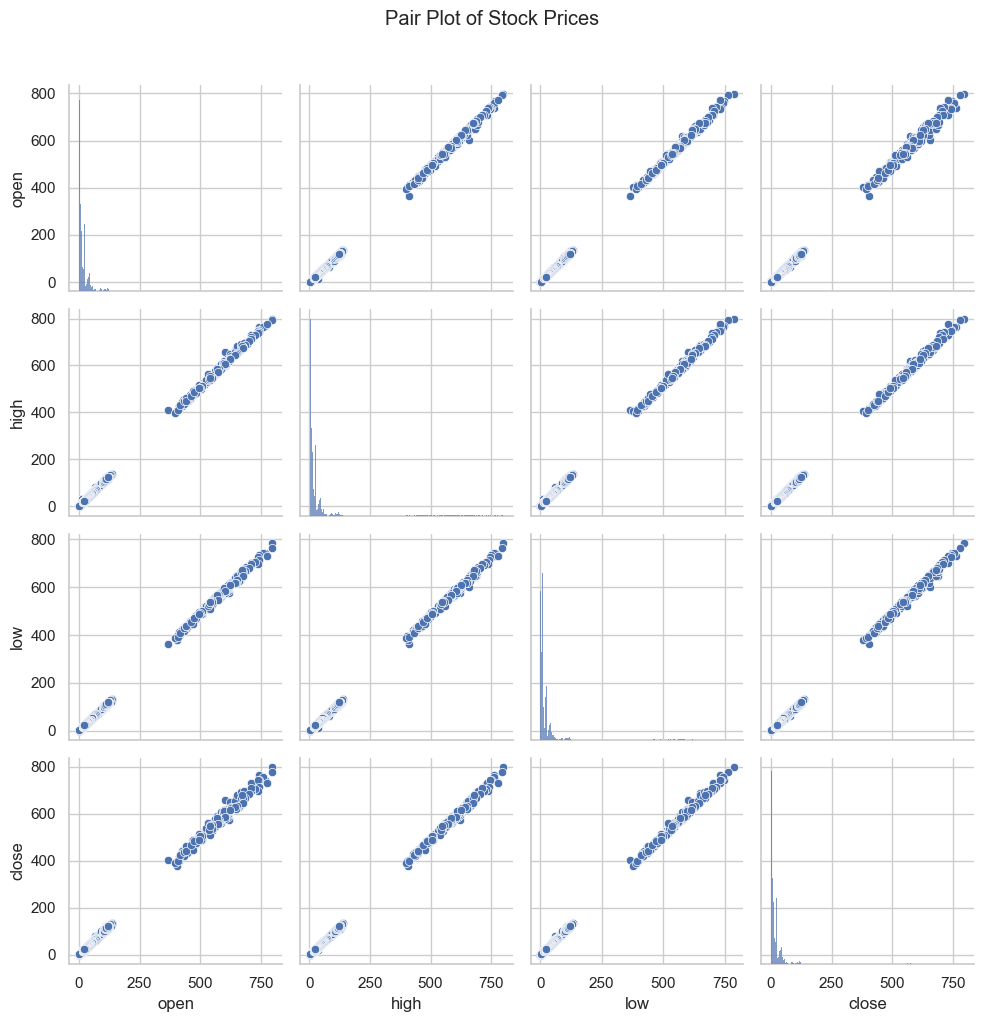

In [188]:
sns.pairplot(data=data_new[['open', 'high', 'low', 'close']])
plt.suptitle('Pair Plot of Stock Prices', y=1.02)
plt.tight_layout()
plt.show()


### Defining features (X) and target (y)

In [189]:
# Define features and target
X = data_new[['open', 'high', 'low', 'close']]
y = data_new['target']

### Splitting the data into training and testing sets

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initializing and training the RandomForestClassifier model

In [191]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

In [192]:
model.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

### Making predictions on the test set

In [193]:
y_pred = model.predict(X_test)

### Perform k-fold cross-validation

In [194]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold)
# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.54820051 0.53791774 0.53791774 0.54498715 0.54820051]
Mean Accuracy: 0.5434447300771208


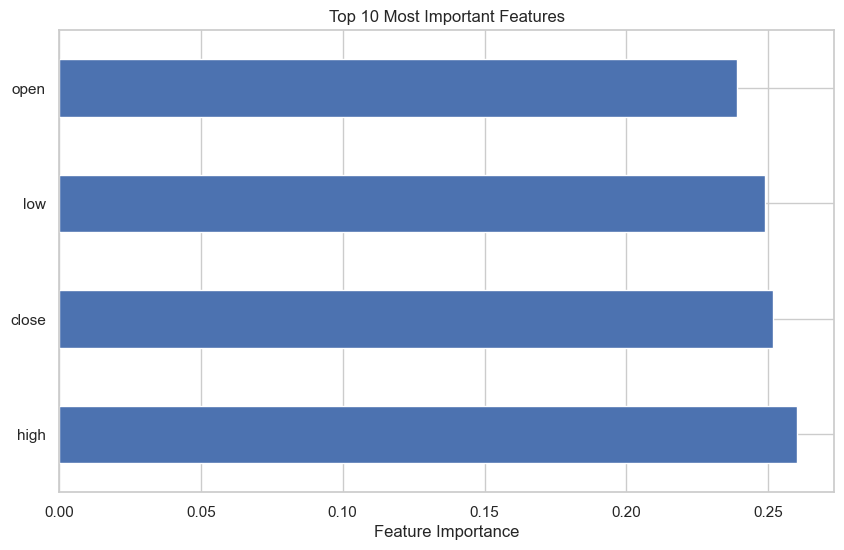

In [195]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

### Calculate precision, recall, and F1-score

In [196]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.4470588235294118
Recall: 0.2275449101796407
F1-score: 0.3015873015873016


    ### Plot ROC curve

In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

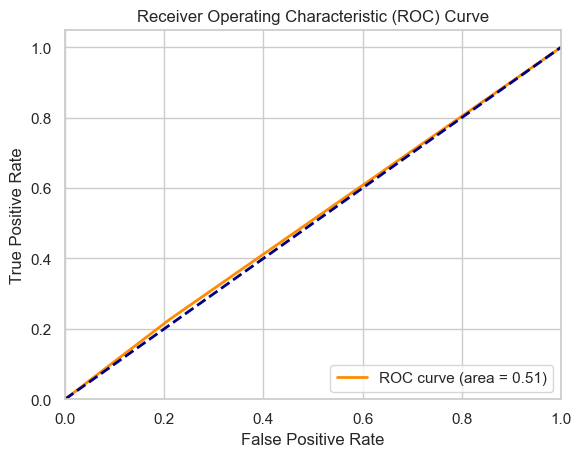

In [198]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [199]:
from sklearn.metrics import confusion_matrix

### Compute confusion matrix

In [200]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

### Plot confusion matrix as a heatmap

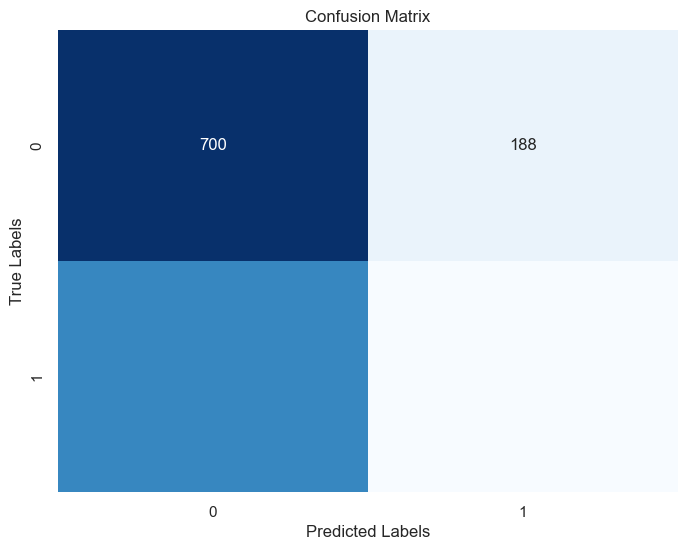

In [201]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [202]:
conf_matrix

array([[700, 188],
       [516, 152]], dtype=int64)

### Computing and printing the accuracy score

In [203]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5475578406169666